<a href="https://colab.research.google.com/github/cortezjoseph/IT3204_TreeRestrial/blob/main/NetForestAndTemperatureChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import plotly.express as px

In [ ]:
forest_data = pd.read_csv('https://raw.githubusercontent.com/cortezjoseph/IT3204_TreeRestrial/main/Datasets/annual-change-forest-area%20(1).csv')
forest_data.head(10)

,Entity,Code,Year,Net forest conversion
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0
2,Algeria,DZA,2010,7600.0
3,Algeria,DZA,2015,-1400.0
4,Argentina,ARG,1990,-182600.0
5,Argentina,ARG,2000,-316400.0
6,Argentina,ARG,2010,-223400.0
7,Argentina,ARG,2015,-104800.0
8,Aruba,ABW,1990,0.0
9,Aruba,ABW,2000,0.0


In [ ]:
forest_data.isna().sum()

Entity                   0
Code                     8
Year                     0
Net forest conversion    0
dtype: int64

In [ ]:
forest_data[forest_data['Code'].isna()]

,Entity,Code,Year,Net forest conversion
136,Faroe Islands,NaN,1990,0.0
137,Faroe Islands,NaN,2000,0.0
138,Faroe Islands,NaN,2010,0.0
139,Faroe Islands,NaN,2015,0.0
143,French Guyana,NaN,1990,-4560.0
144,French Guyana,NaN,2000,-4290.0
145,French Guyana,NaN,2010,-3300.0
146,French Guyana,NaN,2015,-3430.0


In [ ]:
forest_data.iloc[136:140,1] = "FO"
forest_data.iloc[143:147,1] = "GF"
forest_data.rename(columns={"Entity" : "Country"}, inplace=True)
forest_data.isna().sum()

Country                  0
Code                     0
Year                     0
Net forest conversion    0
dtype: int64

In [ ]:
forest_data['Country'].value_counts()

Algeria       4
Monaco        4
Nigeria       4
Niger         4
Nicaragua     4
             ..
Sudan         1
Italy         1
Portugal      1
Madagascar    1
Guinea        1
Name: Country, Length: 132, dtype: int64

In [ ]:
forest_data_countries = forest_data.loc[(forest_data['Country'] == 'World') ]
           
forest_data_countries

,Country,Code,Year,Net forest conversion
464,World,OWID_WRL,1990,-7818000.0
465,World,OWID_WRL,2000,-5117000.0
466,World,OWID_WRL,2010,-4801000.0
467,World,OWID_WRL,2015,-5150000.0


<Axes: xlabel='Year', ylabel='Net forest conversion'>

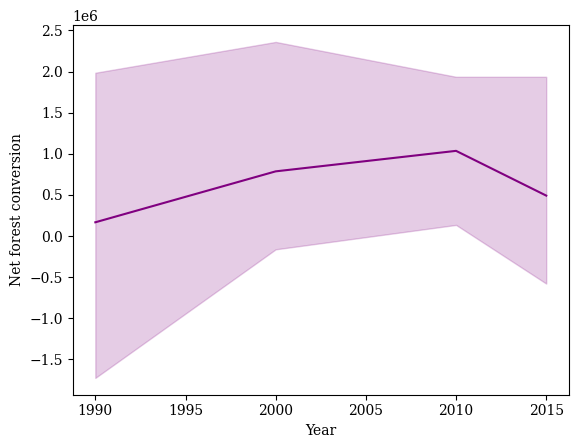

In [ ]:
plt.title('')
sns.lineplot(x='Year', y='Net forest conversion', data=forest_data_countries, sort=False, color='purple')

In [ ]:
forest_data_WRL = forest_data.loc[(forest_data['Country'] == 'World')]
forest_data_CHN = forest_data.loc[(forest_data['Country'] == 'China')]
forest_data_US = forest_data.loc[(forest_data['Country'] == 'United States')]
forest_data_IN = forest_data.loc[(forest_data['Country'] == 'India')]
forest_data_JN = forest_data.loc[(forest_data['Country'] == 'Japan')]

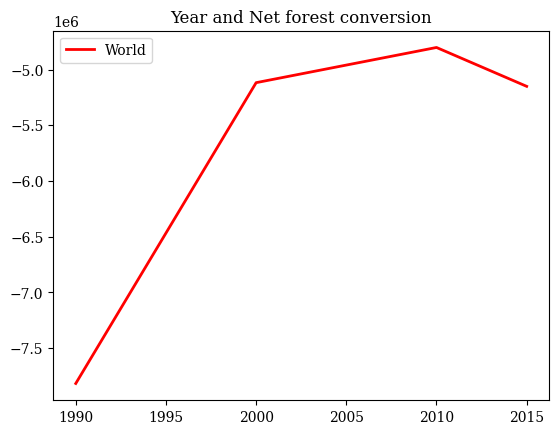

In [ ]:
plt.plot( 'Year', 'Net forest conversion', data=forest_data_WRL, marker='', color='red', linewidth=2, label='World')
plt.legend()
plt.title('Year and Net forest conversion')
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/cortezjoseph/IT3204_TreeRestrial/main/Datasets/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')

In [ ]:
df.loc[:, ~df.columns.isin(['Area Code', 'Months Code', 'Element Code'])].describe()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,8345.00000,8326.000000,8308.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,0.24487,0.382172,0.365322,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,0.75490,0.725313,0.662412,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,-8.40700,-6.784000,-5.847000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,-0.16400,0.171000,0.094000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,0.31200,0.385000,0.367000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,0.59500,0.677000,0.642000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,4.37300,4.411000,4.373000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [ ]:
print("Number of NaN values before filling :\n", df.isnull().sum().sort_values(ascending=False))

df.fillna(df.mean(), inplace=True)

print("\nNumber of NaN values after filling :\n", df.isnull().sum().sort_values(ascending=False))

In [ ]:
print("Number of rows with all NaNs =", len(df[df.isnull().all(axis=1)]))  

Number of rows with all NaNs = 0


In [ ]:
print("Number of duplicate rows =", len(df[df.duplicated()]))

Number of duplicate rows = 0


In [ ]:
df = df.loc[df['Element'] == 'Temperature change']

In [ ]:
df.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1, inplace=True)

In [ ]:
df.replace(to_replace=r'Dec\x96Jan\x96Feb', value='Winter', regex=True, inplace=True)
df.replace(to_replace=r'Mar\x96Apr\x96May', value='Spring', regex=True, inplace=True)
df.replace(to_replace=r'Jun\x96Jul\x96Aug', value='Summer', regex=True, inplace=True)
df.replace(to_replace=r'Sep\x96Oct\x96Nov', value='Fall', regex=True, inplace=True)

In [ ]:
df.rename(columns = {'Area':'country_name', 'Months':'months'}, inplace=True)

In [ ]:
df = pd.melt(df, id_vars=['country_name', 'months'], var_name='year', value_name='temp_change')
df['year'] = [i.split('Y')[-1] for i in df.year]

In [ ]:
df

,country_name,months,year,temp_change
0,Afghanistan,January,1961,0.777
1,Afghanistan,February,1961,-1.743
2,Afghanistan,March,1961,0.516
3,Afghanistan,April,1961,-1.709
4,Afghanistan,May,1961,1.412
...,...,...,...,...
284847,OECD,Winter,2019,1.527
284848,OECD,Spring,2019,1.352
284849,OECD,Summer,2019,1.078
284850,OECD,Fall,2019,1.233


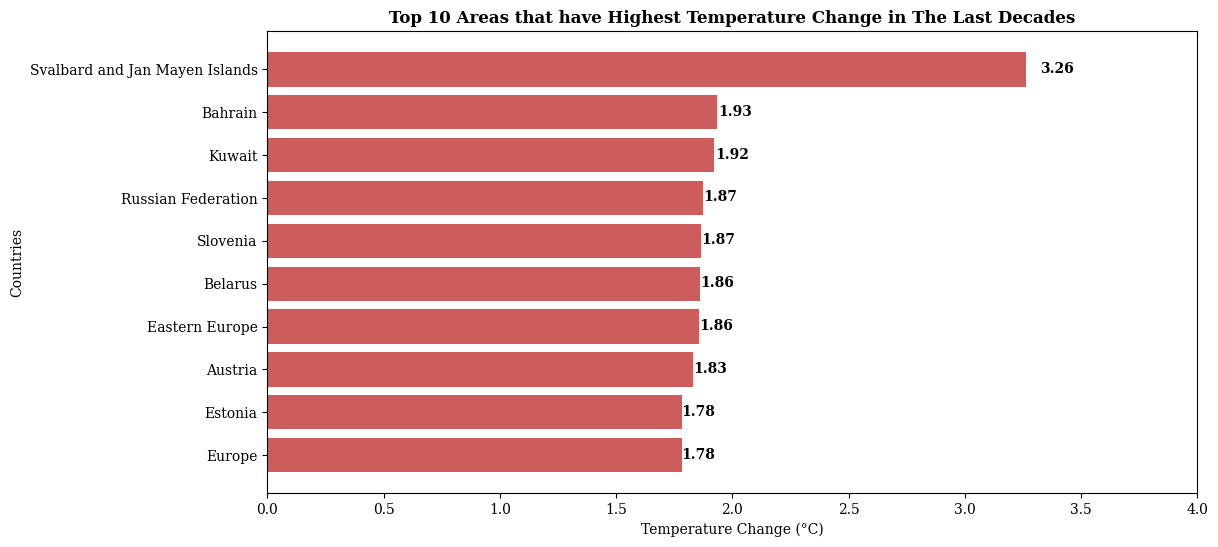

In [ ]:
df1 = df.copy()
df1.set_index('year', inplace=True)
df1 = df1.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df1.reset_index(inplace=True)

df1 = df1.groupby(['country_name',]).agg({'temp_change':'mean'})
df1.reset_index(inplace=True)
df1 = df1.sort_values(by=['temp_change'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,6))

bar1 = plt.barh(df1['country_name'], df1['temp_change'], color='indianred')

temp = round(df1['temp_change'], 2).to_list()

i = 0
for p in bar1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x + width * 1.04, y + height * 0.6, str(temp[i]), ha='center', weight='bold')
    i+=1

ax.set_xlim([0, 4.0])
ax.invert_yaxis()
plt.title("Top 10 Areas that have Highest Temperature Change in The Last Decades", weight='bold')
plt.xlabel("Temperature Change (°C)")
plt.ylabel("Countries")
plt.show()

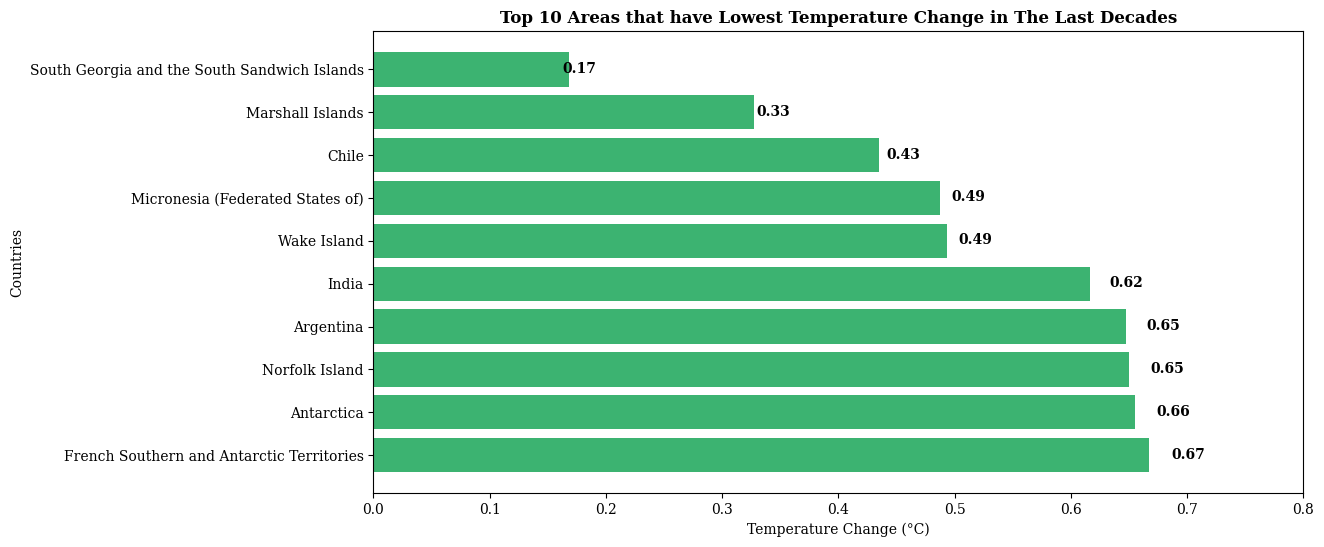

In [ ]:
df2 = df.copy()
df2.set_index('year', inplace=True)
df2 = df2.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df2.reset_index(inplace=True)

df2 = df2.groupby(['country_name',]).agg({'temp_change':'mean'})
df2.reset_index(inplace=True)
df2 = df2.sort_values(by=['temp_change'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(12, 6))

bar2 = plt.barh(df2['country_name'], df2['temp_change'], color='mediumseagreen')

temp = round(df2['temp_change'], 2).to_list()

j = 0
for p in bar2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x + width * 1.05, y + height * 0.6, str(temp[j]), ha='center', weight='bold')
    j+=1

ax.set_xlim([0, 0.8])
ax.invert_yaxis()
plt.title("Top 10 Areas that have Lowest Temperature Change in The Last Decades", weight='bold')
plt.xlabel("Temperature Change (°C)")
plt.ylabel("Countries")
plt.show()

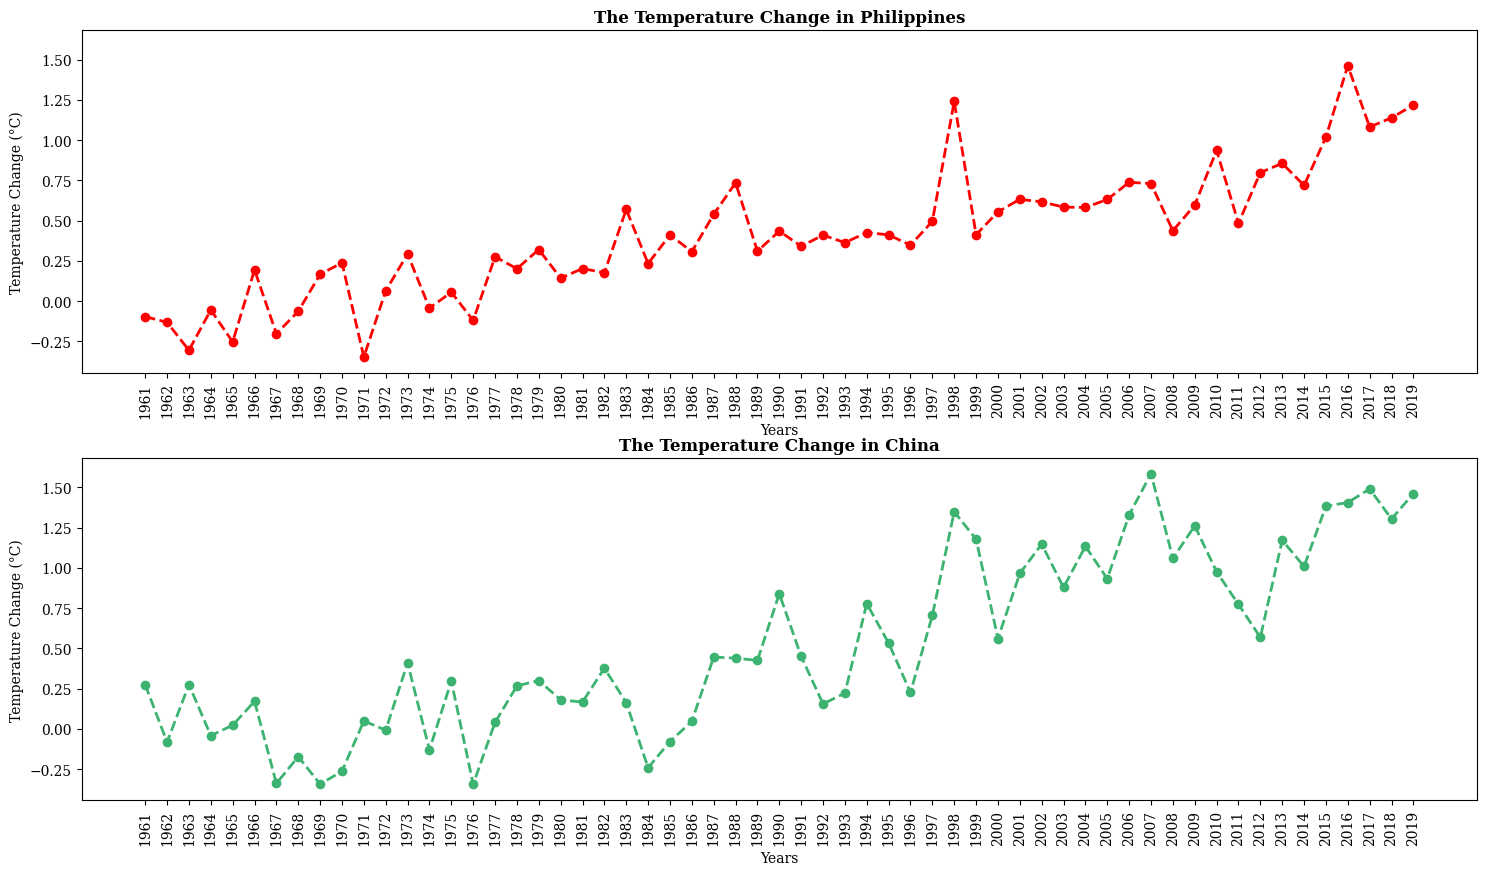

In [ ]:
df3 = df[df['country_name'] == 'Philippines']
country1 = df3.groupby(['year',]).agg({'temp_change':'mean'})
country1.reset_index(inplace=True)
df4 = df[df['country_name'] == 'China']
country2 = df4.groupby(['year',]).agg({'temp_change':'mean'})
country2.reset_index(inplace=True)

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(211)
plt.xticks(rotation=90)
plt.plot(country1['year'], country1['temp_change'], 'o--', color='red', linewidth=2)
plt.title("The Temperature Change in Philippines", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

ax2 = fig.add_subplot(212, sharey=ax1)
plt.xticks(rotation=90)
plt.plot(country2['year'], country2['temp_change'], 'o--', color='mediumseagreen', linewidth=2)
plt.title("The Temperature Change in China", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

plt.show()

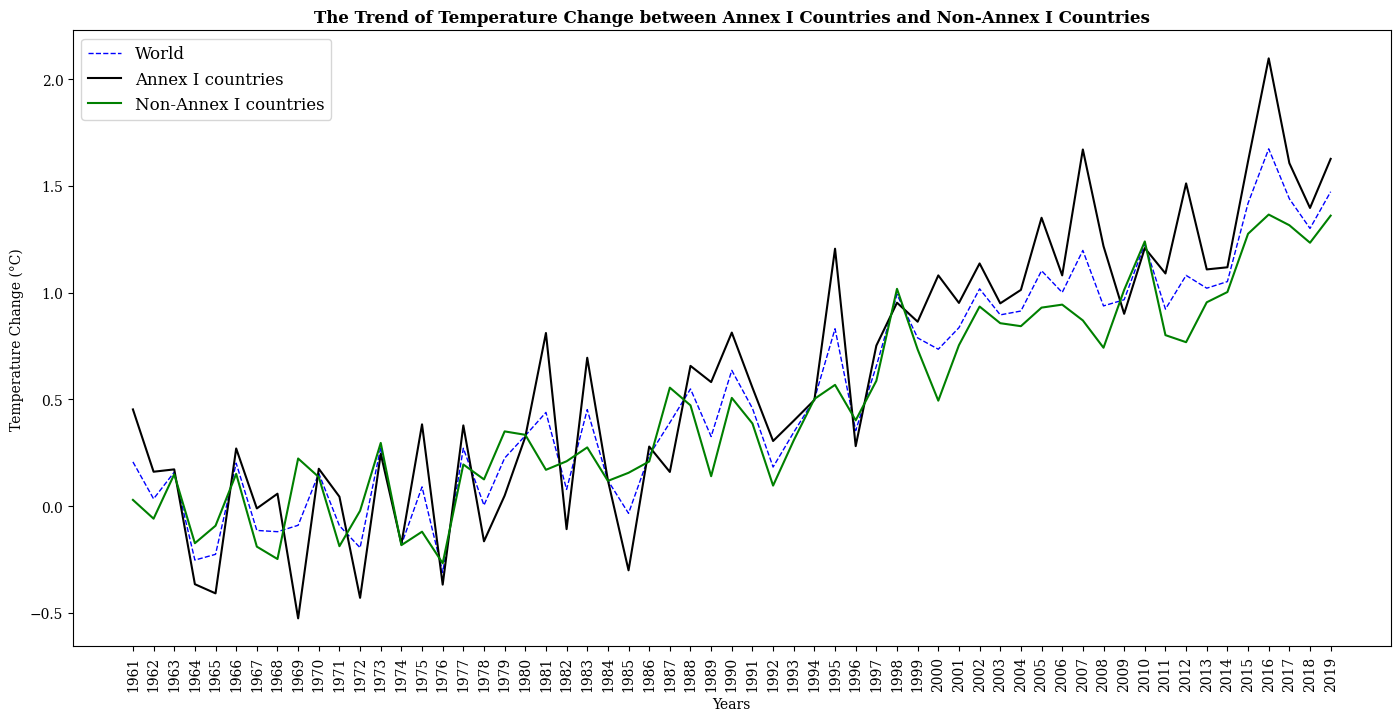

In [ ]:
df5 = df[df['months'] == 'Meteorological year']
world = df5[df5['country_name'] == 'World']
annexI = df5[df5['country_name'] == 'Annex I countries']
non_annexI = df5[df5['country_name'] == 'Non-Annex I countries']

fig, ax = plt.subplots(figsize=(17, 8))

plt.plot(world['year'], world['temp_change'], '--', color='blue', label='World', linewidth=1)
plt.plot(annexI['year'], annexI['temp_change'], '-', color='black', label='Annex I countries')
plt.plot(non_annexI['year'], non_annexI['temp_change'], '-', color='green', label='Non-Annex I countries')

plt.xticks(rotation=90)
plt.legend(fontsize='large')
plt.title("The Trend of Temperature Change between Annex I Countries and Non-Annex I Countries", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")
plt.show()

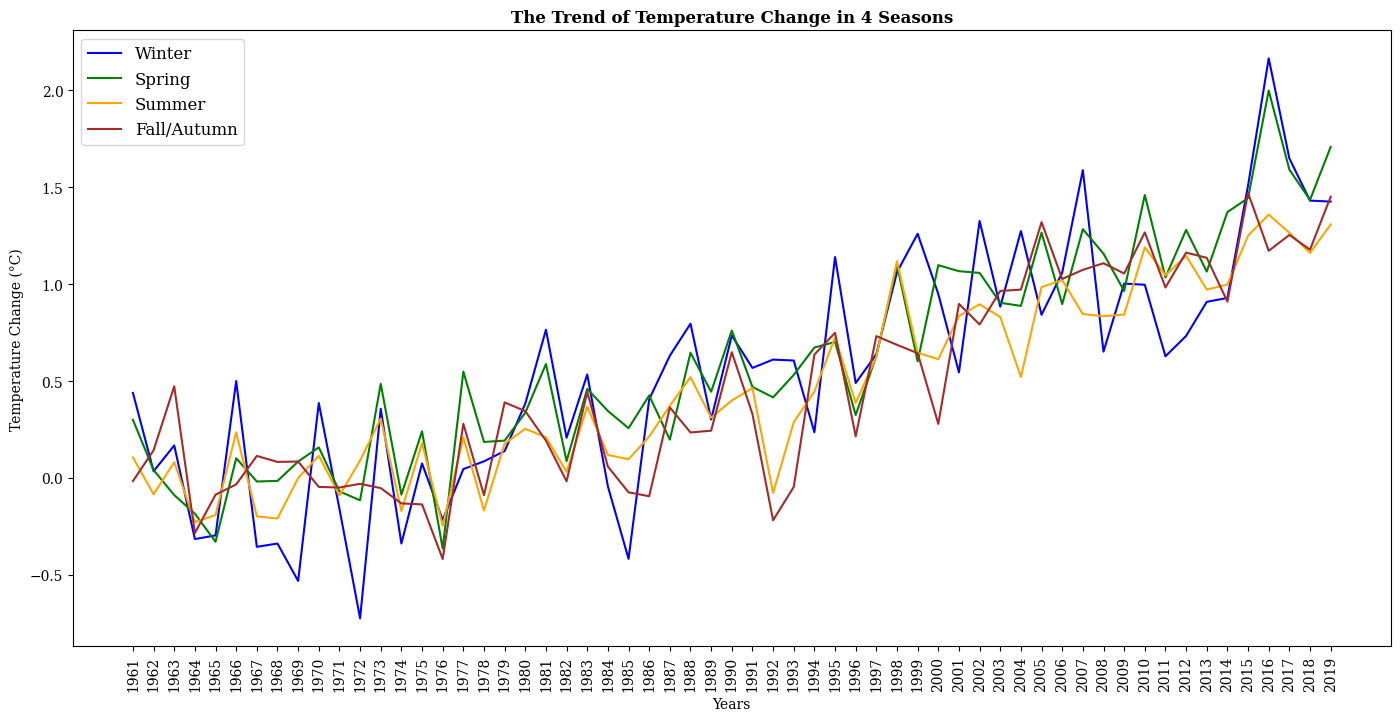

In [ ]:
df6 = df[df['country_name'] == 'World']
winter = df6[df6['months'] == 'Winter']
spring = df6[df6['months'] == 'Spring']
summer = df6[df6['months'] == 'Summer']
fall = df6[df6['months'] == 'Fall']

fig, ax = plt.subplots(figsize=(17, 8))

plt.plot(winter['year'], winter['temp_change'], '-', color='blue', label='Winter')
plt.plot(spring['year'], spring['temp_change'], '-', color='green', label='Spring')
plt.plot(summer['year'], summer['temp_change'], '-', color='orange', label='Summer')
plt.plot(fall['year'], fall['temp_change'], '-', color='brown', label='Fall/Autumn')

plt.xticks(rotation=90)
plt.legend(fontsize='large')
plt.title("The Trend of Temperature Change in 4 Seasons", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")
plt.show()

<ipython-input-119-cdca059f6cf3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



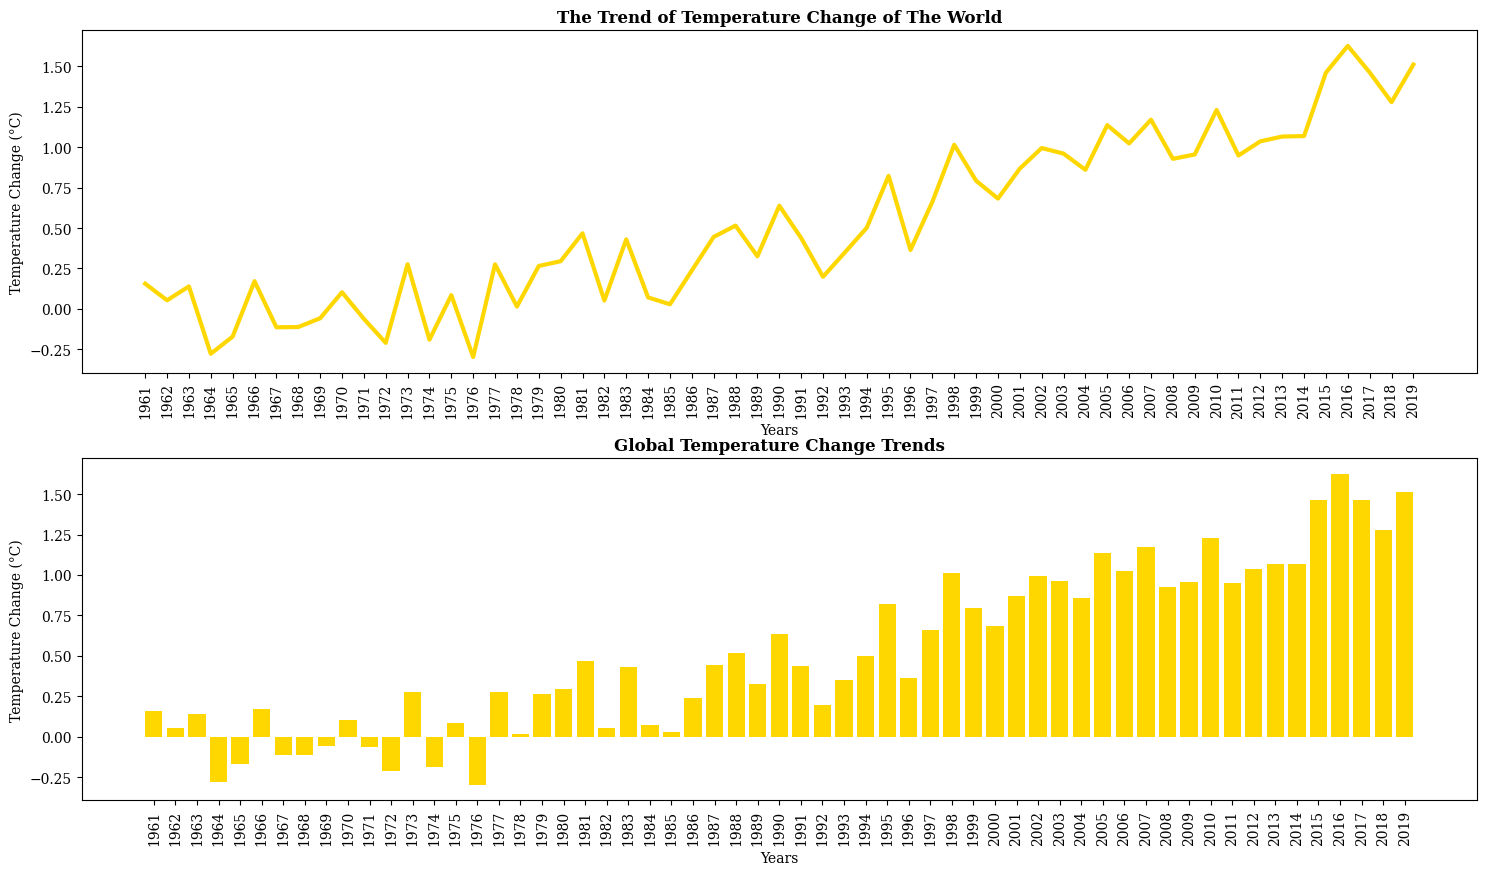

In [ ]:
df7 = df[df['country_name'] == 'World']
df7 = df7.groupby(['year'], as_index=False).mean()

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(211)
plt.plot(df7['year'], df7['temp_change'], '-', color='gold', linewidth=3)
plt.xticks(rotation=90)
plt.title("The Trend of Temperature Change of The World", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

ax2 = fig.add_subplot(212)
plt.bar(df7['year'], df7['temp_change'], color='gold')
plt.xticks(rotation=90)
plt.title("Global Temperature Change Trends", weight='bold')
plt.xlabel("Years")
plt.ylabel("Temperature Change (°C)")

plt.show()

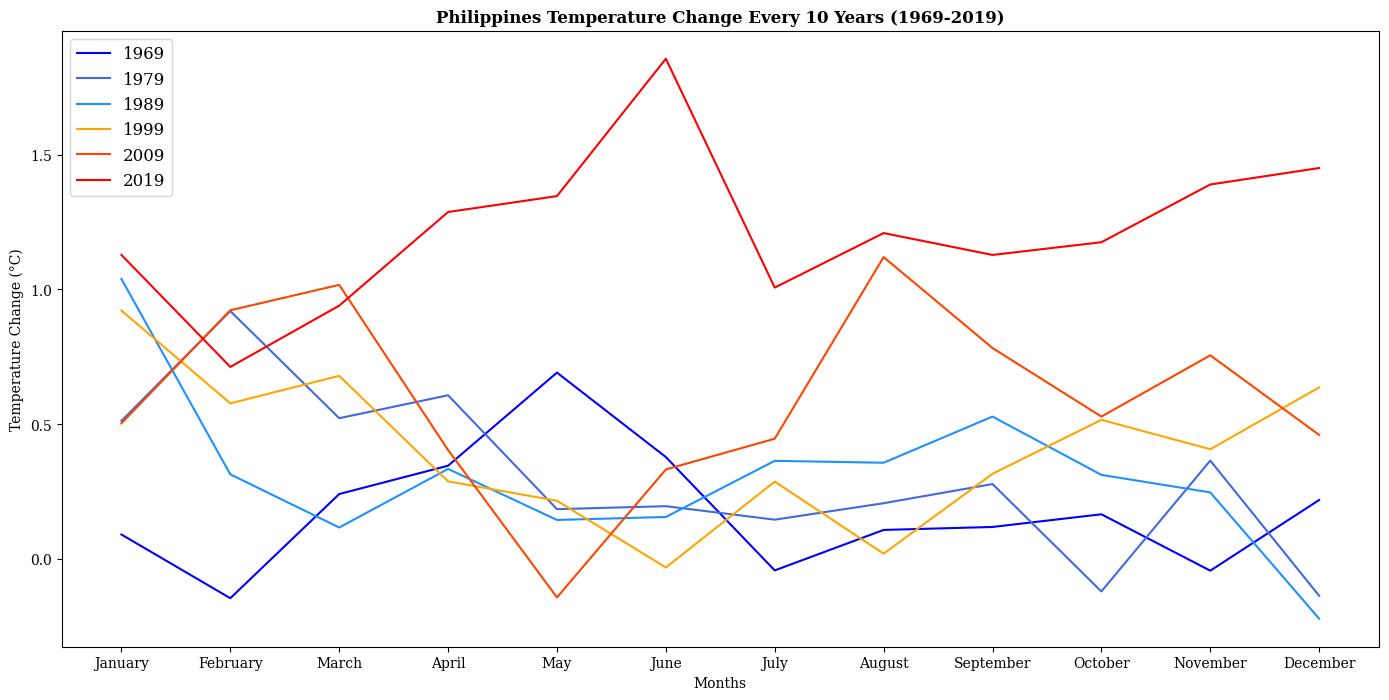

In [ ]:
df8 = df[df['country_name'] == 'Philippines']
y1969 = df8[df8['year'] == '1969'].head(12)
y1979 = df8[df8['year'] == '1979'].head(12)
y1989 = df8[df8['year'] == '1989'].head(12)
y1999 = df8[df8['year'] == '1999'].head(12)
y2009 = df8[df8['year'] == '2009'].head(12)
y2019 = df8[df8['year'] == '2019'].head(12)

fig, ax = plt.subplots(figsize=(17, 8))

plt.plot(y1969['months'], y1969['temp_change'], '-', color='blue', label='1969')
plt.plot(y1979['months'], y1979['temp_change'], '-', color='royalblue', label='1979')
plt.plot(y1989['months'], y1989['temp_change'], '-', color='dodgerblue', label='1989')
plt.plot(y1999['months'], y1999['temp_change'], '-', color='orange', label='1999')
plt.plot(y2009['months'], y2009['temp_change'], '-', color='orangered', label='2009')
plt.plot(y2019['months'], y2019['temp_change'], '-', color='red', label='2019')

plt.legend(fontsize='large')
plt.title("Philippines Temperature Change Every 10 Years (1969-2019)", weight='bold')
plt.xlabel("Months")
plt.ylabel("Temperature Change (°C)")
plt.show()

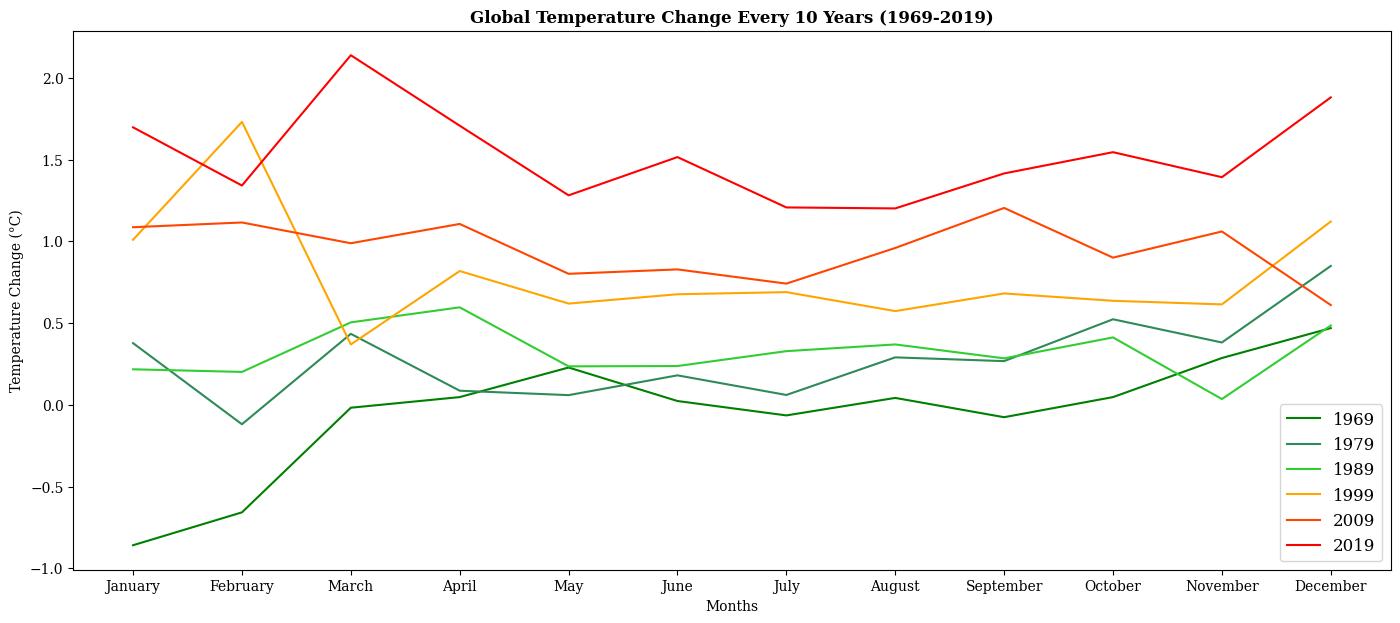

In [ ]:
df9 = df[df['country_name'] == 'World']
y1969 = df9[df9['year'] == '1969'].head(12)
y1979 = df9[df9['year'] == '1979'].head(12)
y1989 = df9[df9['year'] == '1989'].head(12)
y1999 = df9[df9['year'] == '1999'].head(12)
y2009 = df9[df9['year'] == '2009'].head(12)
y2019 = df9[df9['year'] == '2019'].head(12)

fig, ax = plt.subplots(figsize=(17, 7))

plt.plot(y1969['months'], y1969['temp_change'], '-', color='green', label='1969')
plt.plot(y1979['months'], y1979['temp_change'], '-', color='seagreen', label='1979')
plt.plot(y1989['months'], y1989['temp_change'], '-', color='limegreen', label='1989')
plt.plot(y1999['months'], y1999['temp_change'], '-', color='orange', label='1999')
plt.plot(y2009['months'], y2009['temp_change'], '-', color='orangered', label='2009')
plt.plot(y2019['months'], y2019['temp_change'], '-', color='red', label='2019')

plt.legend(fontsize='large')
plt.title("Global Temperature Change Every 10 Years (1969-2019)", weight='bold')
plt.xlabel("Months")
plt.ylabel("Temperature Change (°C)")
plt.show()